<a href="https://colab.research.google.com/github/pandeykiran80/ceri8211globalgeophysics/blob/master/HW4_4C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#"Kiran Pandey: HW4-4c&d
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#"Defining variables and coefficients"
N_POINTS = 100 # Number of lattitudes and longitudes used to plot the geoid."
theta = np.linspace(0, np.pi, N_POINTS) # Geocentric  (theta)   latitudes and longitudes where the geoid will be visualised.
phi = np.linspace(0, 2*np.pi, N_POINTS) # phi longitude
radius = 6378136.3
#" Gauss coefficients for dipole and quadrupole components-WGRF 2005 model"
#g(n,m) n is the order and m is the degree
g10 =   -29557
g11 =   -1672
h11 =   +5080
g20 =   -2341
g21 =   +3047
h21 =   -2595
g22 =   +1657
h22 =   -517

In [0]:
#"Defining function
"defining legendre polynomial"
def lgndre(n,m,theta):
    if n==0 and m==0:
        return 1
    elif n== 1 and m==0:
        return np.cos(theta)
    elif n==1 and m ==1:
        return np.sin(theta)
    elif n==2 and m==0:
        return (1/4)*((3*np.cos(2*theta)+1))
    elif n==2 and m==1:
        return (np.sqrt(3)/2)*np.sin(2*theta)
    elif n ==2 and m==2:
        return ((np.sqrt(3))/2)*(np.sin(theta))**2

In [0]:
#" Calculating Geomagnetic Potential based on WGRF 2005 model"
#R=r i.e R/r=1:
geomagneticPotential = radius*((g10*lgndre(1,0,theta))+((g11*np.cos(phi)+h11*np.sin(phi))*lgndre(1,1,theta))+(g20*lgndre(2,0,theta))+((g21*np.cos(phi)+h21*np.sin(phi))*lgndre(2,1,theta))+((g22*np.cos(2*phi)+h22*np.sin(2*phi))*lgndre(2,2,theta)))       
#print(geomagneticPotential)

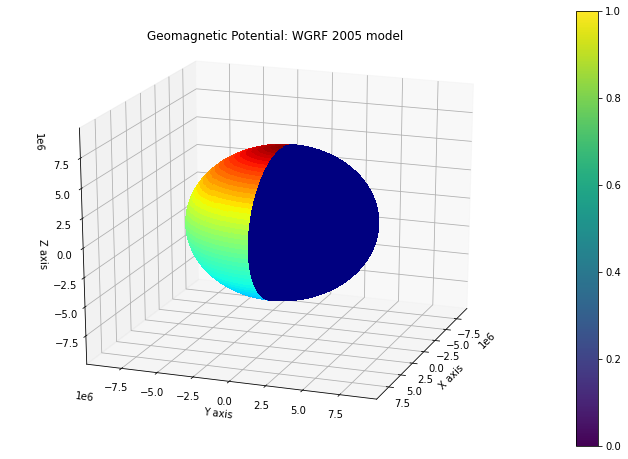

In [31]:
#"#Plottings"
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
#ax.set_aspect(1.)
ax.view_init(elev=20., azim=20.)
ax.set_xlim([-1.5*radius, 1.5*radius])
ax.set_ylim([-1.5*radius, 1.5*radius])
ax.set_zlim([-1.5*radius, 1.5*radius])

# Make sure the shape of the potentials is the same as the points used to plot the sphere.
geomagneticPotentialPlot = np.meshgrid( geomagneticPotential, geomagneticPotential )[0] 
geomagneticPotentialPlot /= geomagneticPotentialPlot.max() # Normalise to [0 1]

#" Plot a sphere. "
Xs = radius * np.outer(np.cos(theta), np.sin(phi))
Ys = radius * np.outer(np.sin(theta), np.sin(phi))
Zs = radius * np.outer(np.ones(theta.size), np.cos(phi))


surf = ax.plot_surface(Xs, Ys, Zs, facecolors=plt.cm.jet(geomagneticPotentialPlot), rstride=1, cstride=1, linewidth=0, antialiased=False, shade=False)
plt.title('Geomagnetic Potential: WGRF 2005 model')
ax.set_xlabel ('X axis')
ax.set_ylabel ('Y axis')
ax.set_zlabel ('Z axis')
fig.colorbar(surf)
fig.show()

In [0]:
#" Gauss coefficients for dipole and quadrupole components-WGRF 2005 model "
#g(n,m) n is the order and m is the degree
g10_2020 =   -29404.5
g11_2020 =   -1450.7
h11_2020 =   +4652.9
g20_2020 =   -2500
g21_2020 =   +2982
h21_2020 =   -2991.6
g22_2020 =   +1676.8
h22_2020 =   -734.8

In [0]:
#" Calculating Geomagnetic Potential based on WGRF 2020 model"
#R=r i.e R/r=1:
geomagneticPotential_2020 = radius*((g10_2020*lgndre(1,0,theta))+((g11_2020*np.cos(phi)+h11*np.sin(phi))*lgndre(1,1,theta))+(g20_2020*lgndre(2,0,theta))+((g21_2020*np.cos(phi)+h21_2020*np.sin(phi))*lgndre(2,1,theta))+((g22_2020*np.cos(2*phi)+h22_2020*np.sin(2*phi))*lgndre(2,2,theta)))       
#print(geomagneticPotential_2020)

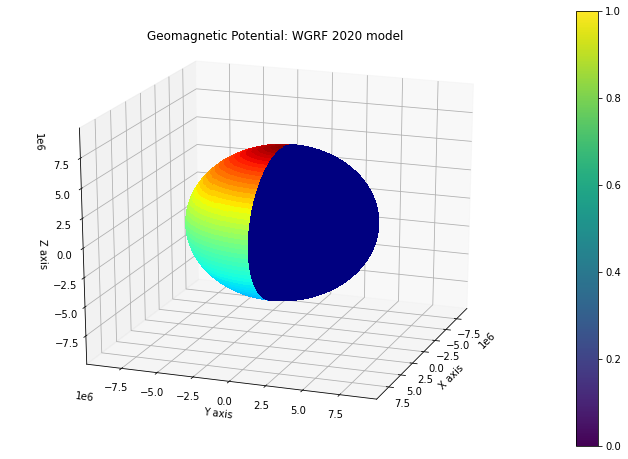

In [36]:
#"#Plottings"
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
#ax.set_aspect(1.)
ax.view_init(elev=20., azim=20.)
ax.set_xlim([-1.5*radius, 1.5*radius])
ax.set_ylim([-1.5*radius, 1.5*radius])
ax.set_zlim([-1.5*radius, 1.5*radius])

# Make sure the shape of the potentials is the same as the points used to plot the sphere.
geomagneticPotentialPlot_2020 = np.meshgrid( geomagneticPotential_2020, geomagneticPotential_2020 )[0] 
geomagneticPotentialPlot_2020 /= geomagneticPotentialPlot_2020.max() # Normalise to [0 1]

surf = ax.plot_surface(Xs, Ys, Zs, facecolors=plt.cm.jet(geomagneticPotentialPlot_2020), rstride=1, cstride=1, linewidth=0, antialiased=False, shade=False)
plt.title('Geomagnetic Potential: WGRF 2020 model')
ax.set_xlabel ('X axis')
ax.set_ylabel ('Y axis')
ax.set_zlabel ('Z axis')
fig.colorbar(surf)
fig.show()